In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [12]:

file_path = "tips (data for regression problem).csv"
df = pd.read_csv(file_path)

print("Dataset Preview:\n", df.head())

print("\nMissing Values:\n", df.isnull().sum())


Dataset Preview:
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Missing Values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [13]:


encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_features = ['sex', 'smoker', 'day', 'time']

encoded_features = encoder.fit_transform(df[categorical_features])

encoded_column_names = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_column_names)

df = pd.concat([df.drop(columns=categorical_features), encoded_df], axis=1)

scaler = StandardScaler()
numerical_features = ['total_bill', 'size']
scaled_features = scaler.fit_transform(df[numerical_features])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)
df = pd.concat([df.drop(columns=numerical_features), scaled_df], axis=1)

X = df.drop(columns=['tip'])
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=100, gamma=0.1),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}


In [15]:

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    r
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
print("\nModel Performance:\n", results_df)



Model Performance:
                Model       MAE       MSE      RMSE        R2
0  Linear Regression  0.667133  0.703357  0.838664  0.437302
1   Ridge Regression  0.666862  0.700632  0.837038  0.439481
2   Lasso Regression  0.654883  0.612105  0.782371  0.510305
3      Decision Tree  0.690545  0.848990  0.921407  0.320792
4      Random Forest  0.754120  0.930777  0.964768  0.255361
5                SVR  0.737179  0.965186  0.982439  0.227834
6                KNN  0.719959  0.837683  0.915250  0.329838


In [16]:

best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (from Random Forest):\n", feature_importances)



Feature Importances (from Random Forest):
       Feature  Importance
6  total_bill    0.767147
1  smoker_Yes    0.069031
7        size    0.058963
2     day_Sat    0.030186
3     day_Sun    0.025849
0    sex_Male    0.024554
4    day_Thur    0.012284
5  time_Lunch    0.011987


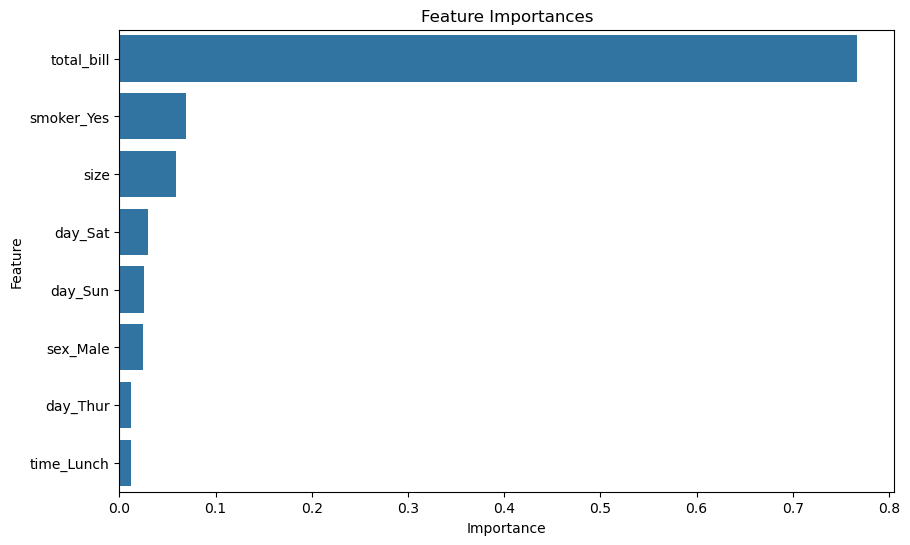


Actionable Insights:
1. Total bill is the most significant predictors of tip amount.
2. The restaurant can focus on optimizing service for larger group sizes to increase tipping behavior.


In [20]:


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

print("\nActionable Insights:")
print("1. Total bill is the most significant predictors of tip amount.")
print("2. The restaurant can focus on optimizing service for larger group sizes to increase tipping behavior.")
